## Loan Application Status Prediction
### Problem Statement:
##### This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [361]:
data = pd.read_csv('loan_prediction.csv')

In [362]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [363]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [364]:
data.shape

(614, 13)

In [365]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [366]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data cleaning 

In [367]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [368]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

### As our data is less we will impute all values in gender column

In [369]:
data.nunique().to_frame("No of Unique Values")

,No of Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [370]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [371]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [372]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [373]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [374]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [375]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [376]:
data['ApplicantIncome'].value_counts()

2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [377]:
data['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [378]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [379]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [380]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [381]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

### Data Imputer and Encoder(KNN imputer and Label Encoder)

### Label encoding

In [382]:
from sklearn.preprocessing import LabelEncoder

In [383]:
lab_enc = LabelEncoder()
data['Property_Area'] = lab_enc.fit_transform(data['Property_Area'])
data['Loan_Status'] = lab_enc.fit_transform(data['Loan_Status'])

In [384]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,1


In [385]:
# knn imputer will try to find the relation with other columns and impute the data according the relation with the other 
# column.
# In this case Age nan is depending on the similarity of the fare columns.
from sklearn.impute import KNNImputer

In [386]:
knnimp= KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(data[['LoanAmount','Property_Area']]))
data['LoanAmount']=knn_imp

In [387]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [388]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,109.0,360.0,1.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,1


In [389]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [390]:
knnimp= KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(data[['Loan_Amount_Term','Credit_History']]))
data['Loan_Amount_Term']=knn_imp

In [391]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [392]:
knnimp= KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(data[['Credit_History','Loan_Amount_Term',]]))
data['Credit_History']=knn_imp

In [393]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [394]:
data.shape

(614, 13)

In [395]:
data.dropna(inplace=True)

In [396]:
data.shape

(554, 13)

In [397]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,109.0,360.0,1.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,1


In [398]:
data['Gender'] = lab_enc.fit_transform(data['Gender'])
data['Married'] = lab_enc.fit_transform(data['Married'])
data['Dependents'] = lab_enc.fit_transform(data['Dependents'])
data['Education'] = lab_enc.fit_transform(data['Education'])

In [399]:
data['Self_Employed'] = lab_enc.fit_transform(data['Self_Employed'])

In [400]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,109.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [401]:
data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [402]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [403]:
data.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [404]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,109.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## EDA(Exploratory data analysis)

### Univariate analysis

In [405]:
import warnings 
warnings.filterwarnings('ignore')

In [406]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

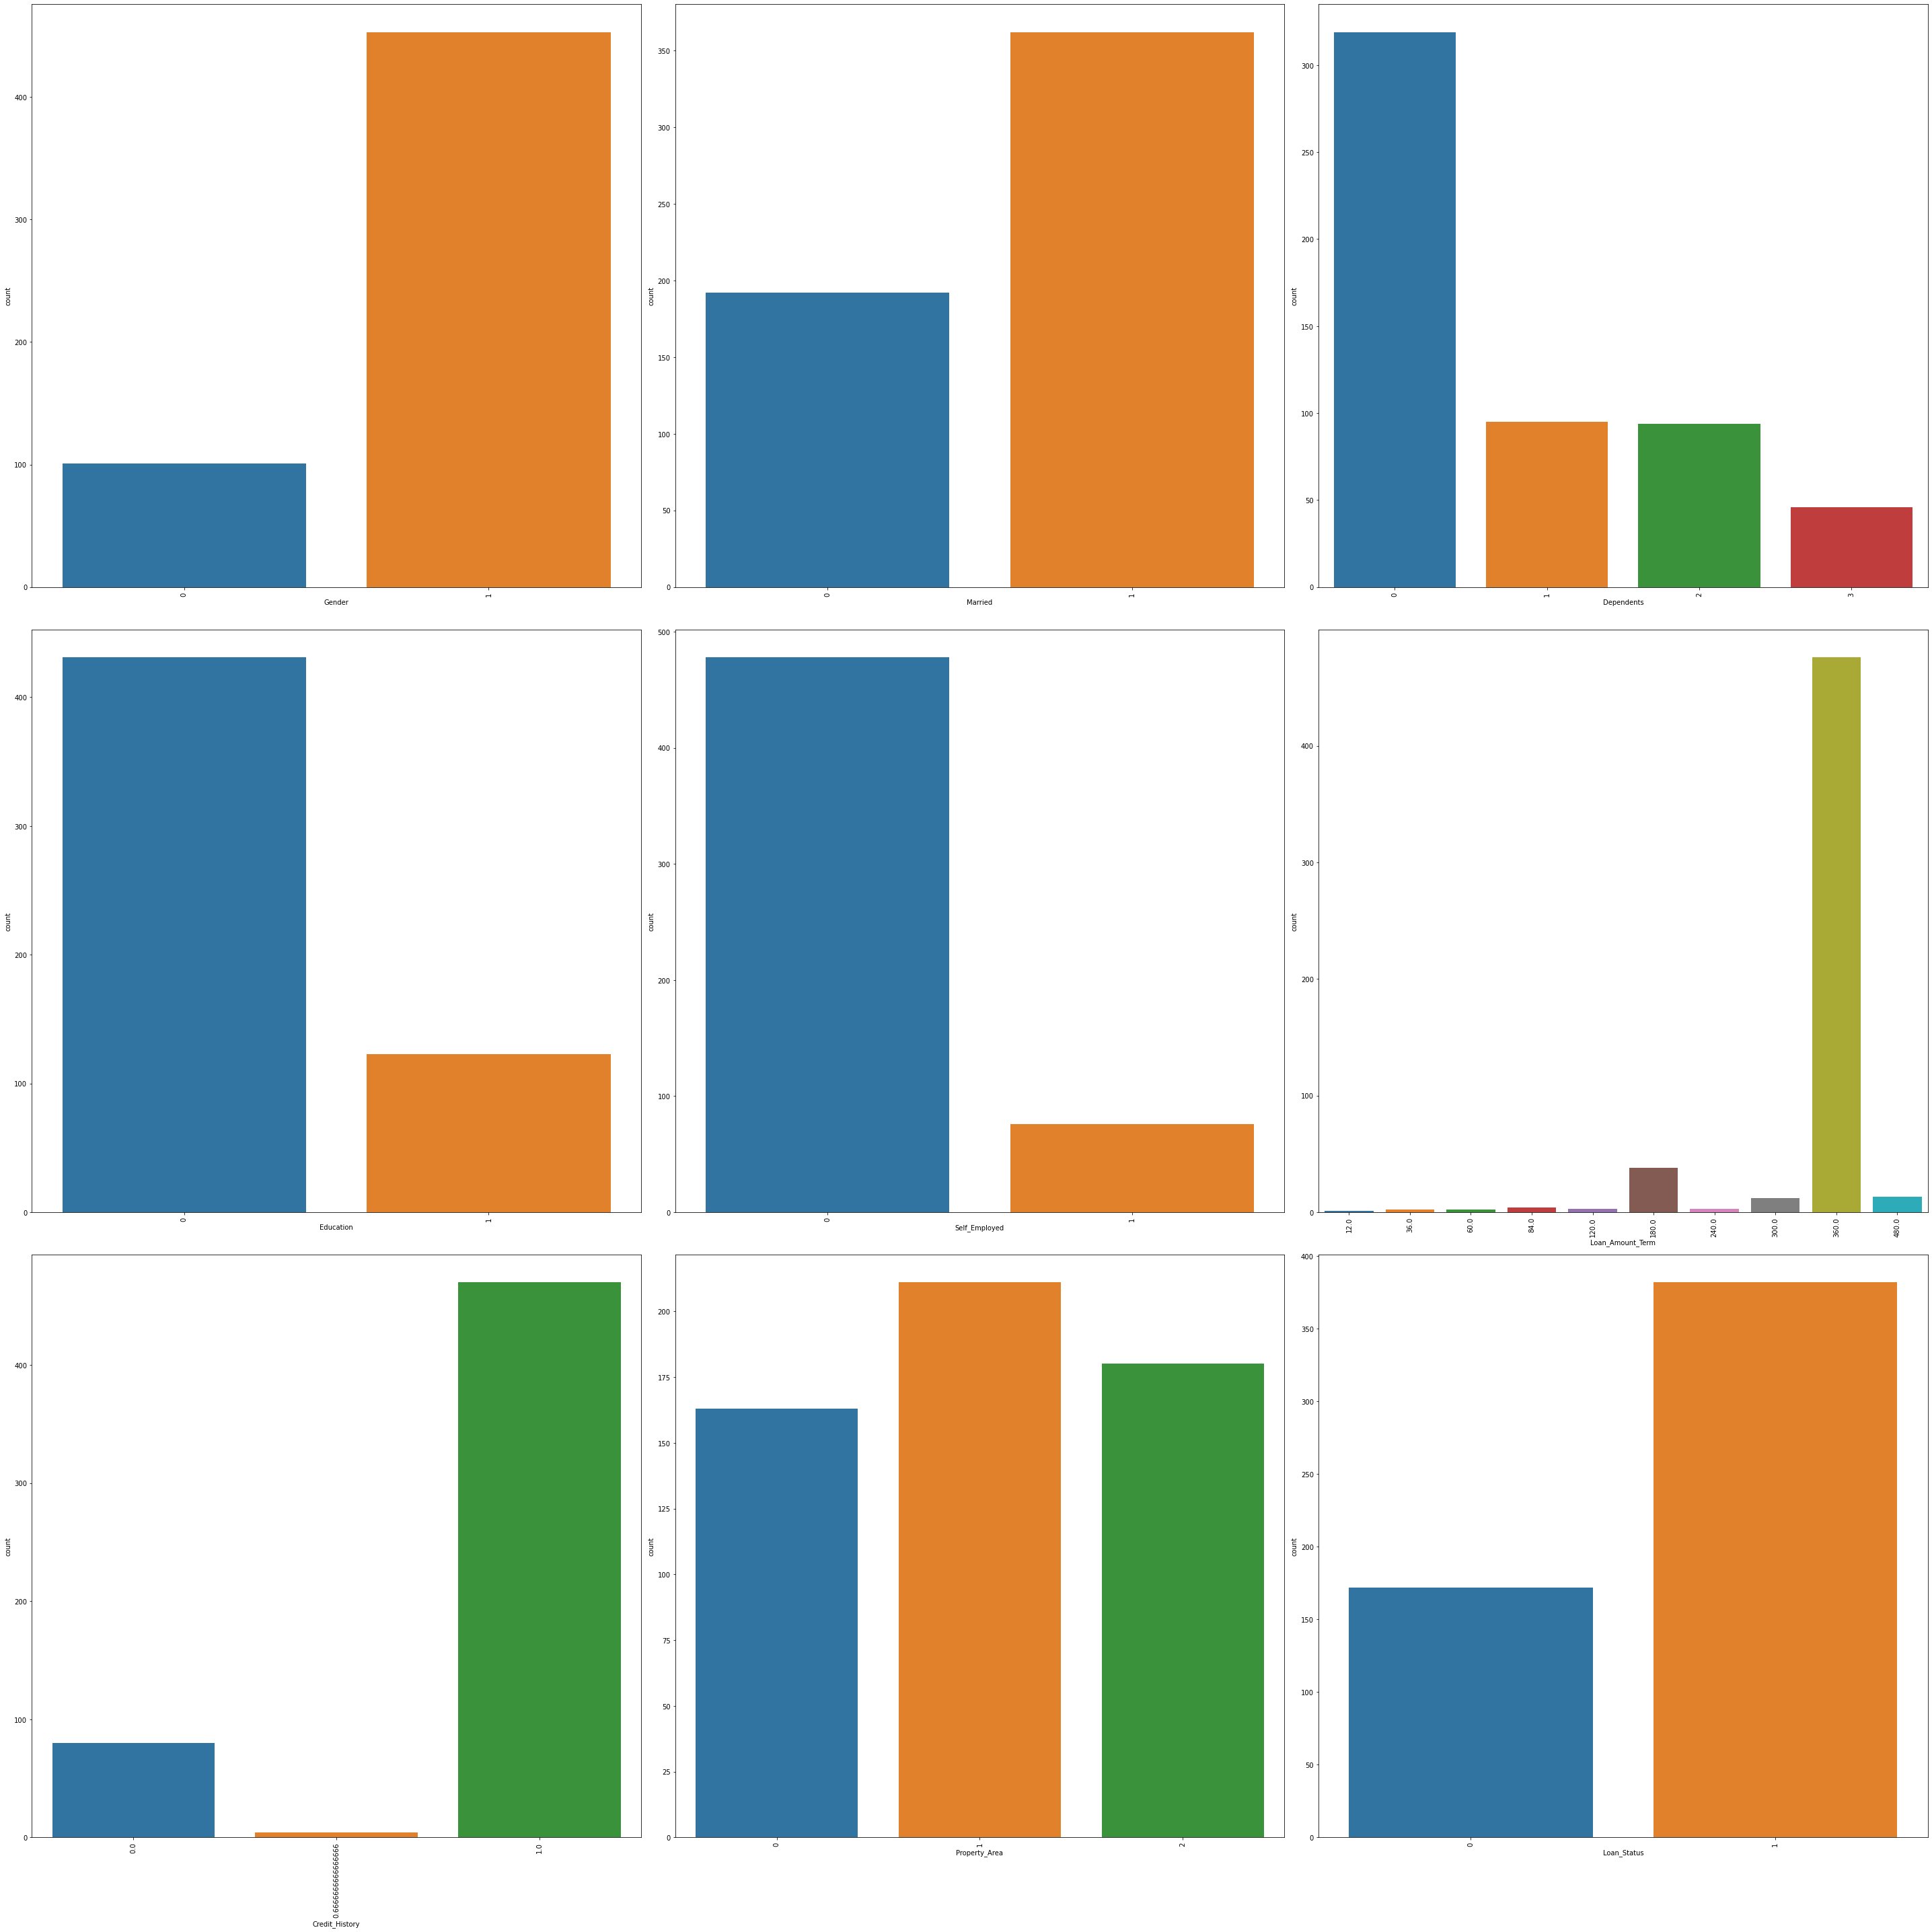

In [407]:
count_col=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
plt.figure(figsize=(40,40))
for i in range(len(count_col)):
  plt.subplot(3,3,i+1)
  sns.countplot(data[count_col[i]])
  plt.xticks(rotation=90)
  plt.tight_layout()

### Bi-variate ANALYSIS

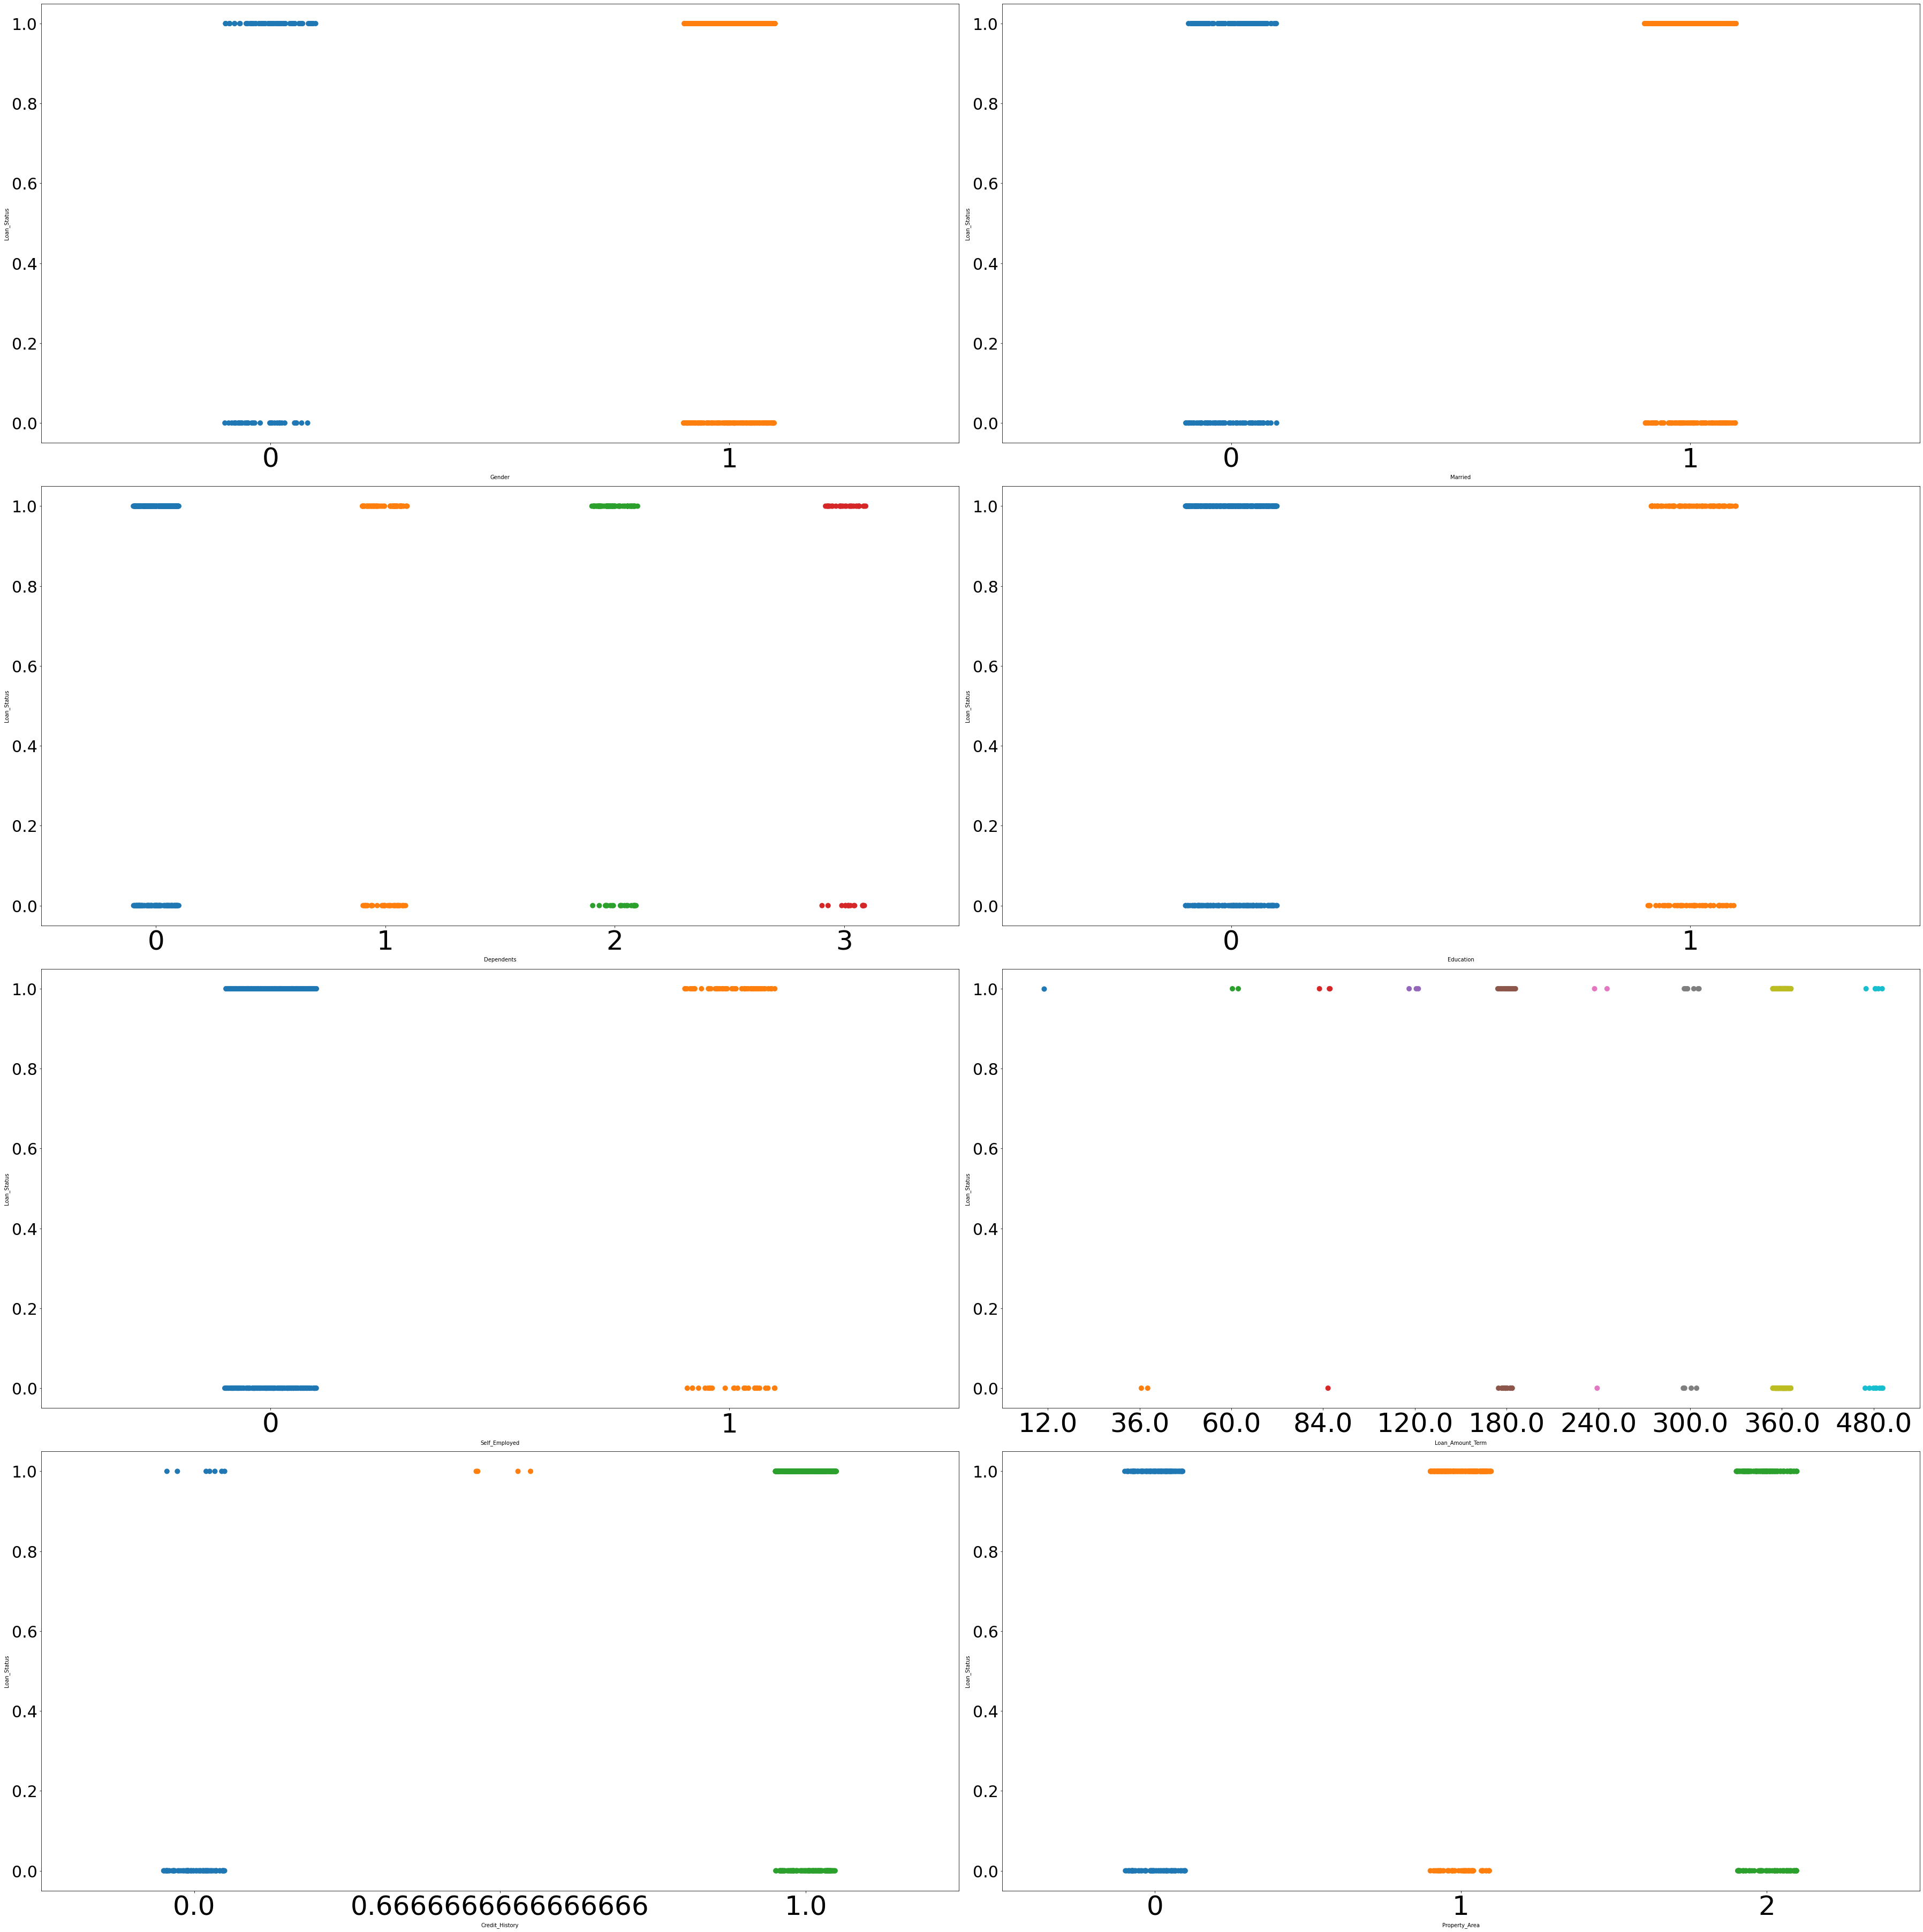

In [408]:
col1 = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
plt.figure(figsize=(50,500))
for i in range(len(col1)):
  plt.subplot(40,2,i+1)
  sns.stripplot(y='Loan_Status',x=data[col1[i]],data=data,size=10)
  plt.xticks(fontsize=50)
  plt.yticks(fontsize=30)
  plt.tight_layout()

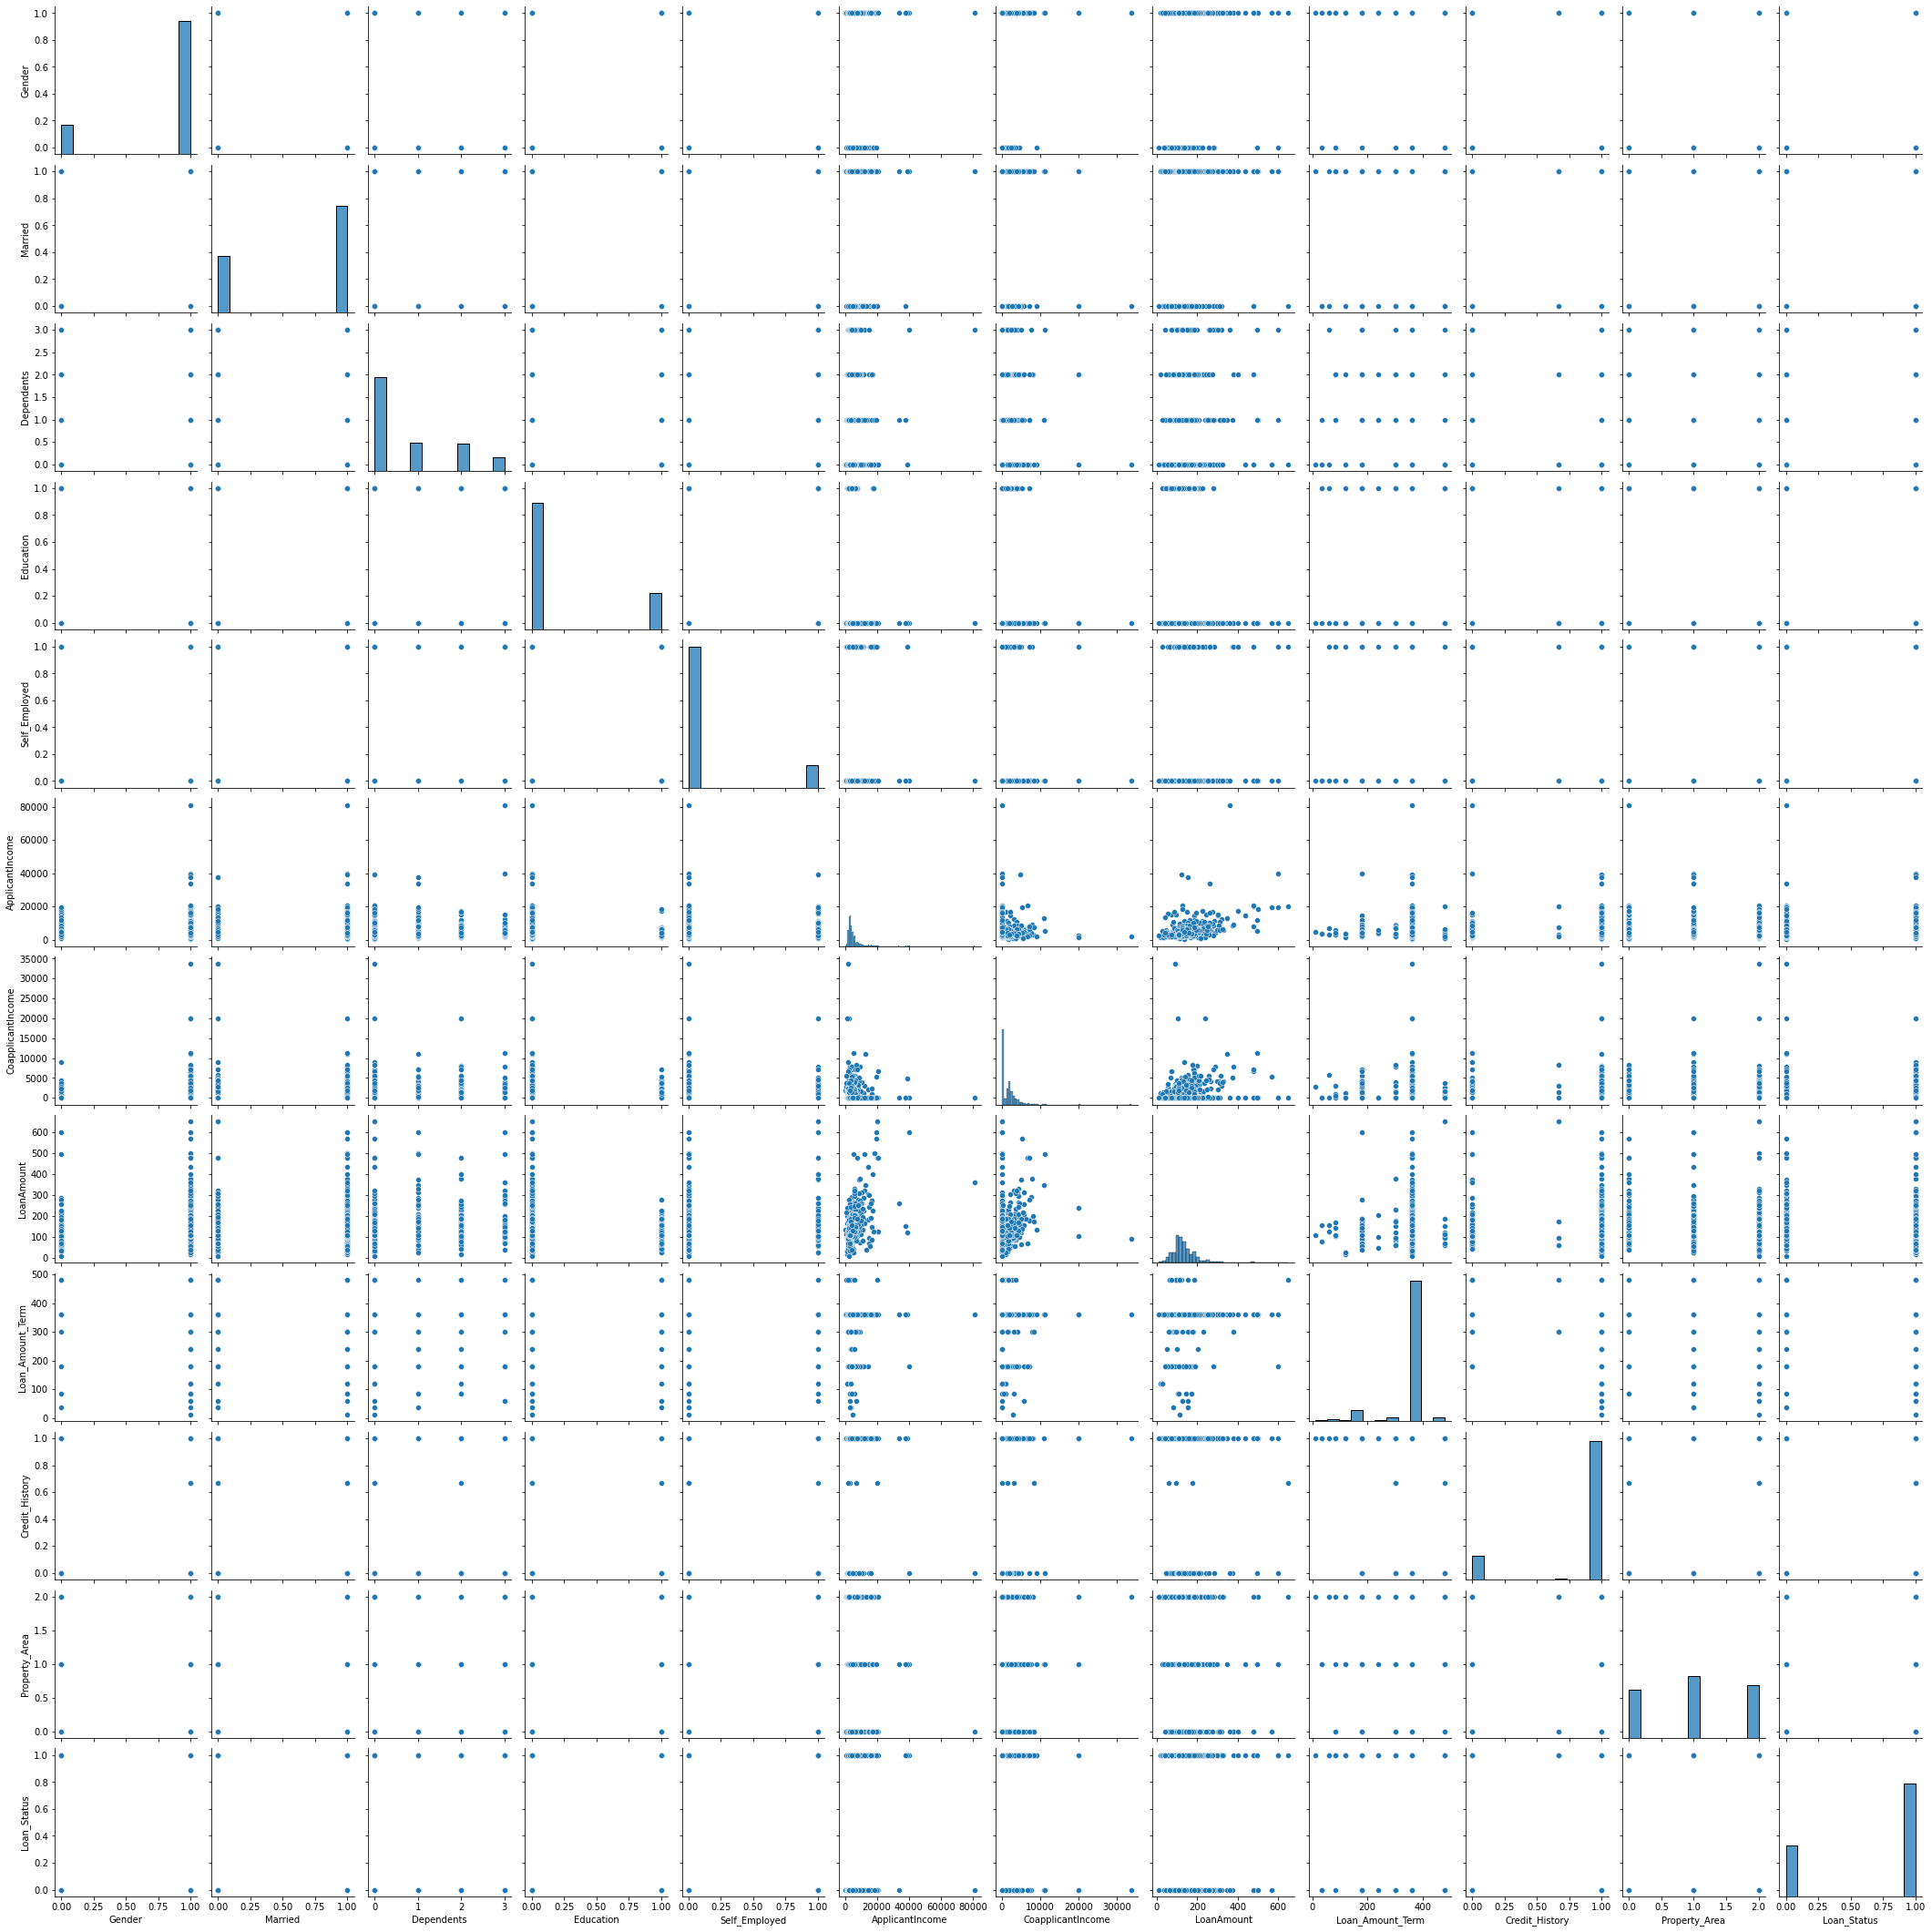

In [409]:
sns.pairplot(data)

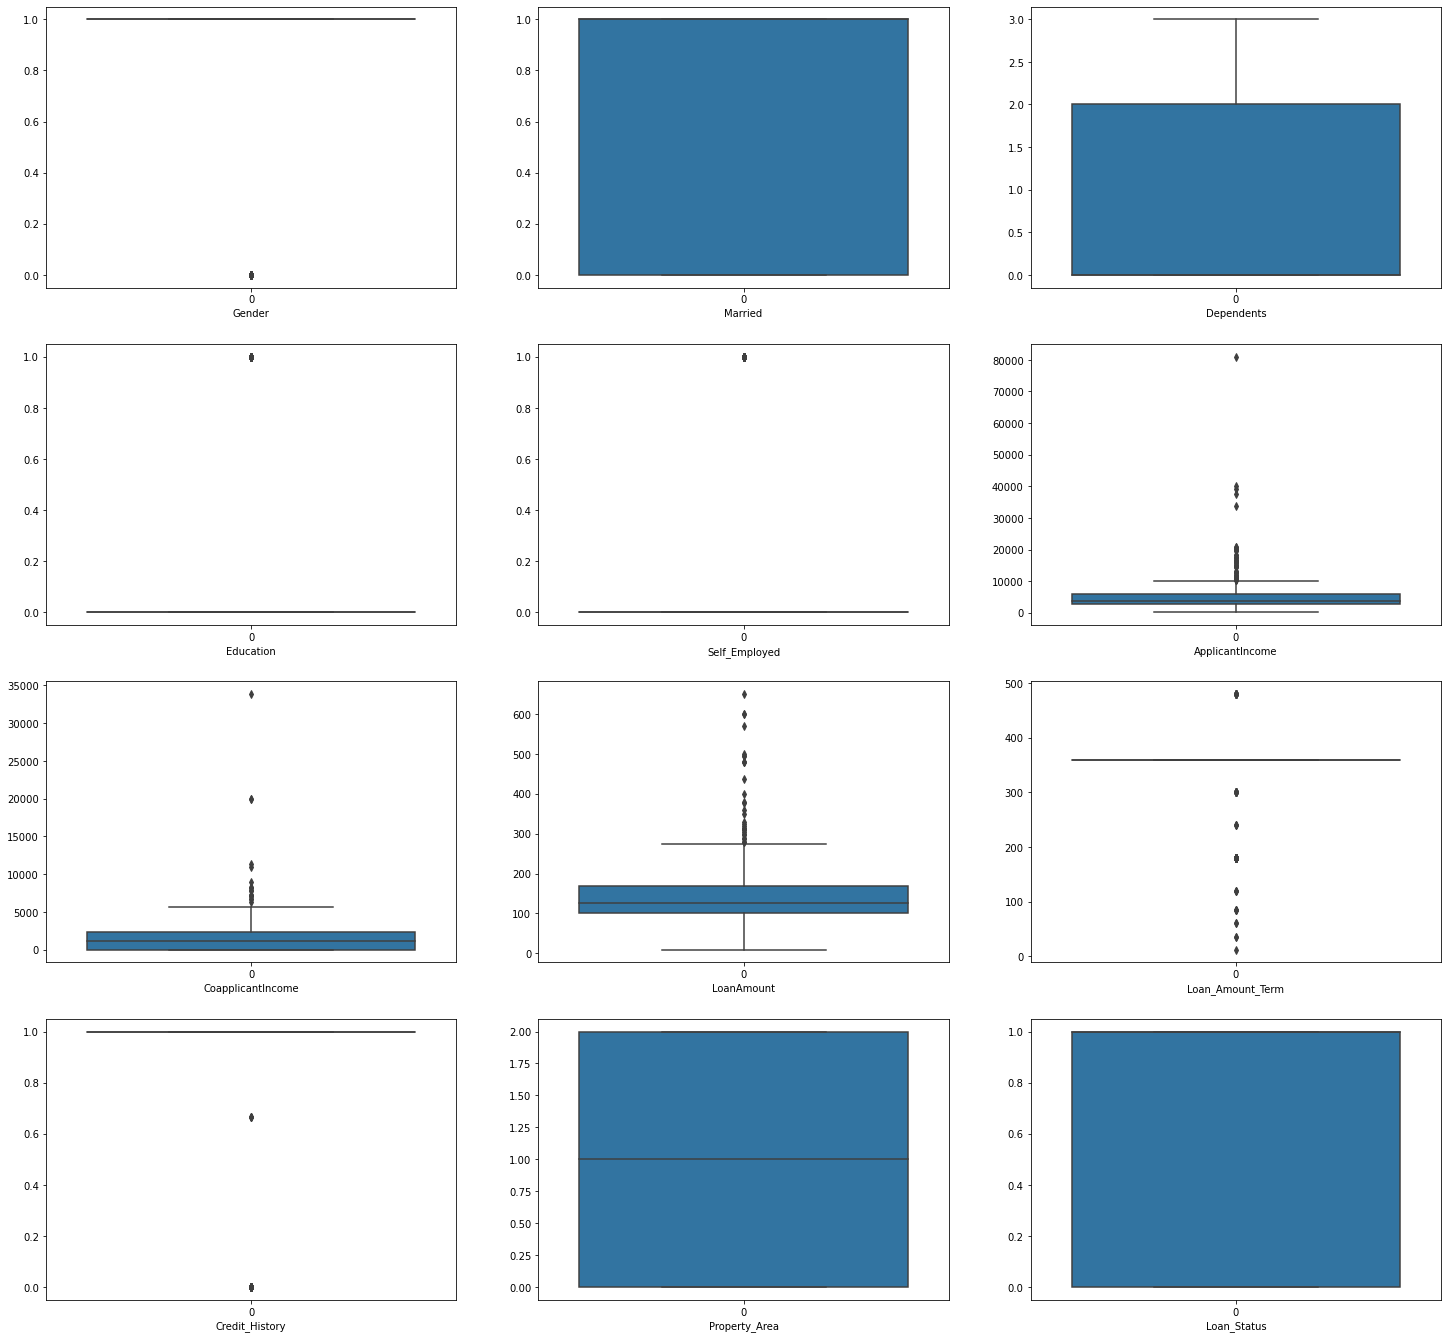

In [410]:
### checking for outliers
plt.figure(figsize=(25,30))
graph=1

for column in data:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

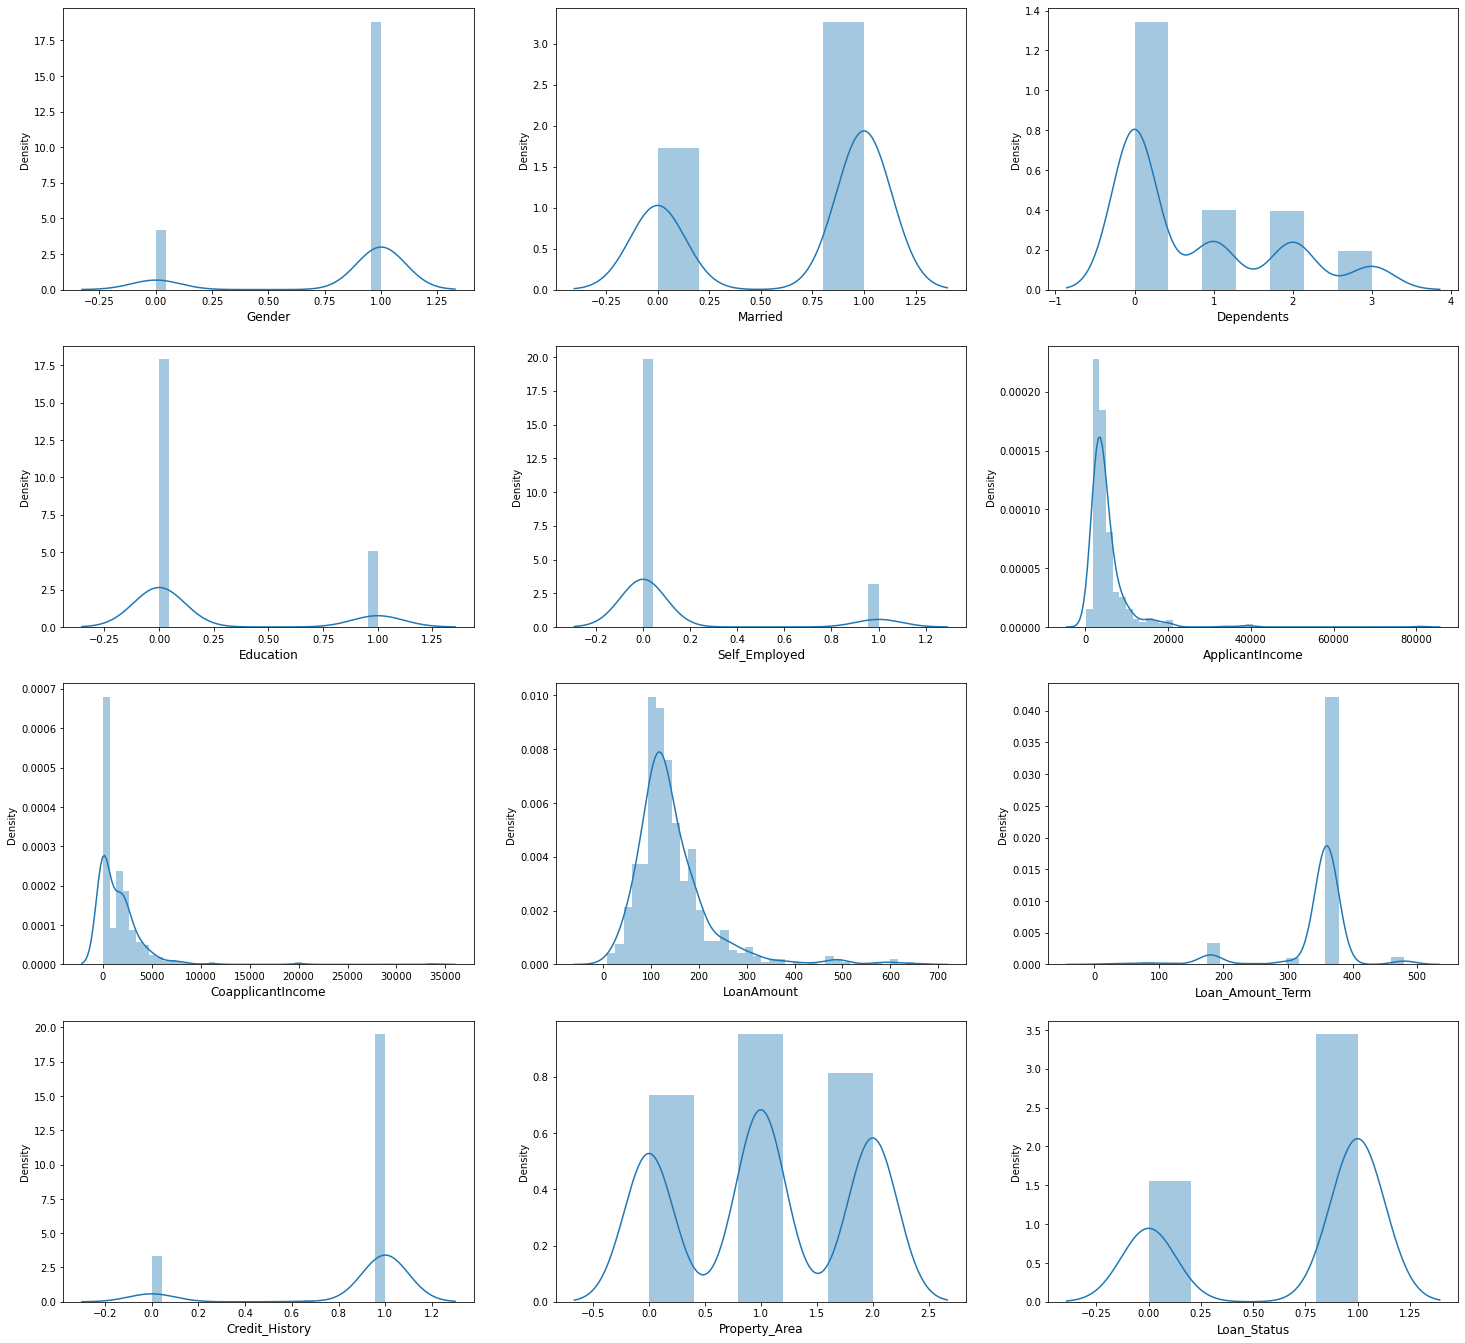

In [411]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=15: #as there are 64 columns in data
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()

### CONTINOUS column - ApplicantIncome, CoapplicantIncome, LoanAmount

In [412]:
abs(data.corr()['Loan_Status']).sort_values(ascending=True)

Dependents           0.006596
Loan_Amount_Term     0.007980
Self_Employed        0.015924
Gender               0.026701
Property_Area        0.036112
CoapplicantIncome    0.037370
ApplicantIncome      0.042492
LoanAmount           0.045968
Education            0.082720
Married              0.101573
Credit_History       0.529738
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Correlation with Loan_Status'}>

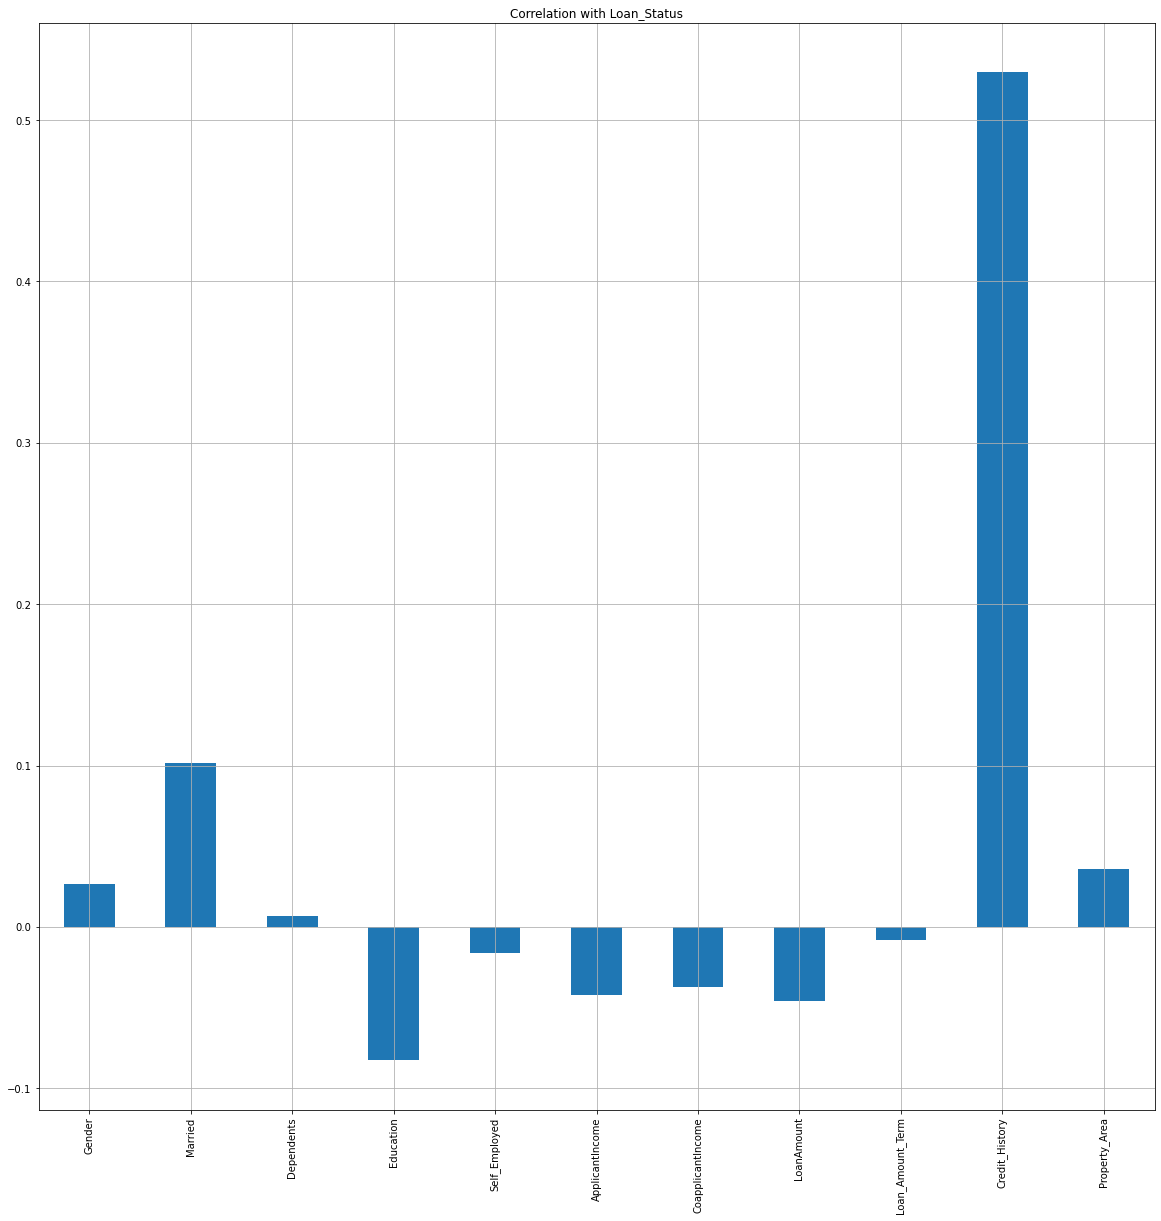

In [413]:
# visualize the correlation
data.drop('Loan_Status', axis =1).corrwith(data['Loan_Status']).plot(kind ='bar',grid = True, figsize = (20,20),
                                                   title = 'Correlation with Loan_Status')

### heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

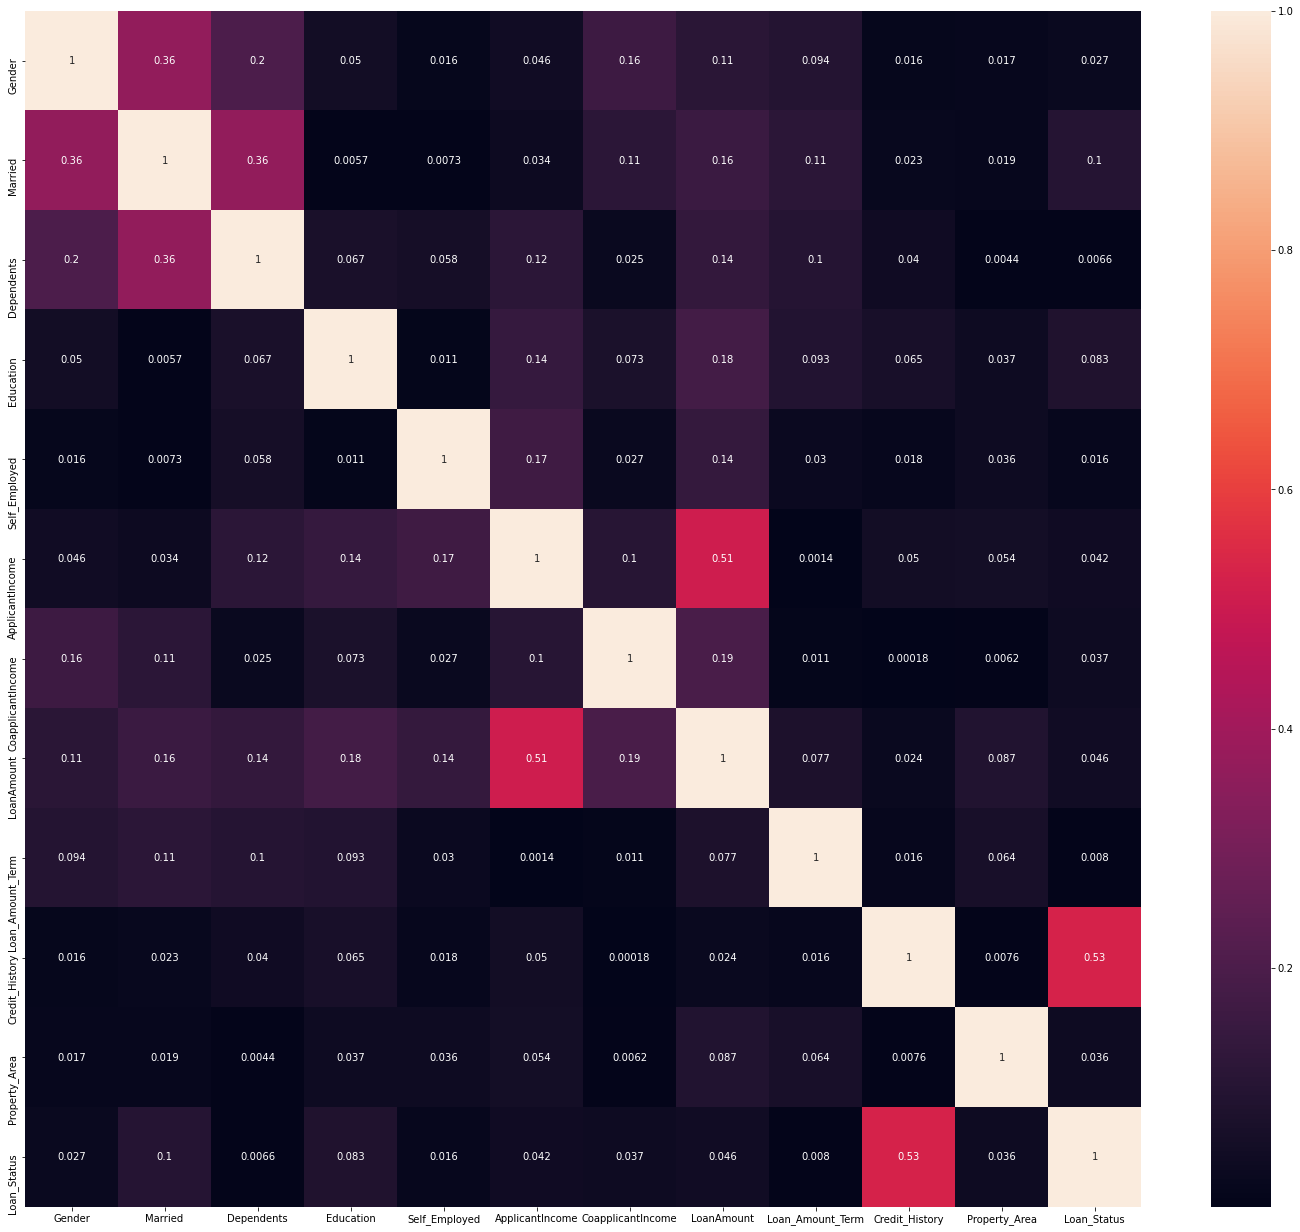

In [414]:
### plotting heatmap
plt.figure(figsize=(25,22))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

## Data preprocessing

## Data preprocessing
- outliers removed - IQR 
- data normalization - power transformer(skewness)
- Vif value for multicolinearity

In [415]:
#quantile 1
q1=data.quantile(0.25)
#QUANTILE 3
q3=data.quantile(0.75)

IQR=q3-q1
IQR

Gender                  0.00
Married                 1.00
Dependents              2.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2975.00
CoapplicantIncome    2297.25
LoanAmount             70.00
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64

#### Outfiers detection formula
##### higherside==> Q3+(1.5*IQR)
##### lowerside==>Q3 -(1.5*IQR)

In [416]:
itv_high=(q3.ApplicantIncome+1.5*IQR.ApplicantIncome)
print(itv_high)
index = np.where(data['ApplicantIncome']>itv_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

10281.25
(510, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,109.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
506,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
507,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
508,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


#### now not removing outliers from anycolumn due to less data

In [417]:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data[features]  = pt.fit_transform(data[features].values)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.974916,-1.164453,-0.320783,360.0,1.0,2,1
1,1,1,1,0,0,0.405638,0.679951,0.042966,360.0,1.0,0,0
2,1,1,0,0,1,-0.511479,-1.164453,-1.341311,360.0,1.0,2,1
3,1,1,0,1,0,-0.814902,0.841143,-0.105419,360.0,1.0,2,1
4,1,0,0,0,0,1.036241,-1.164453,0.271260,360.0,1.0,2,1


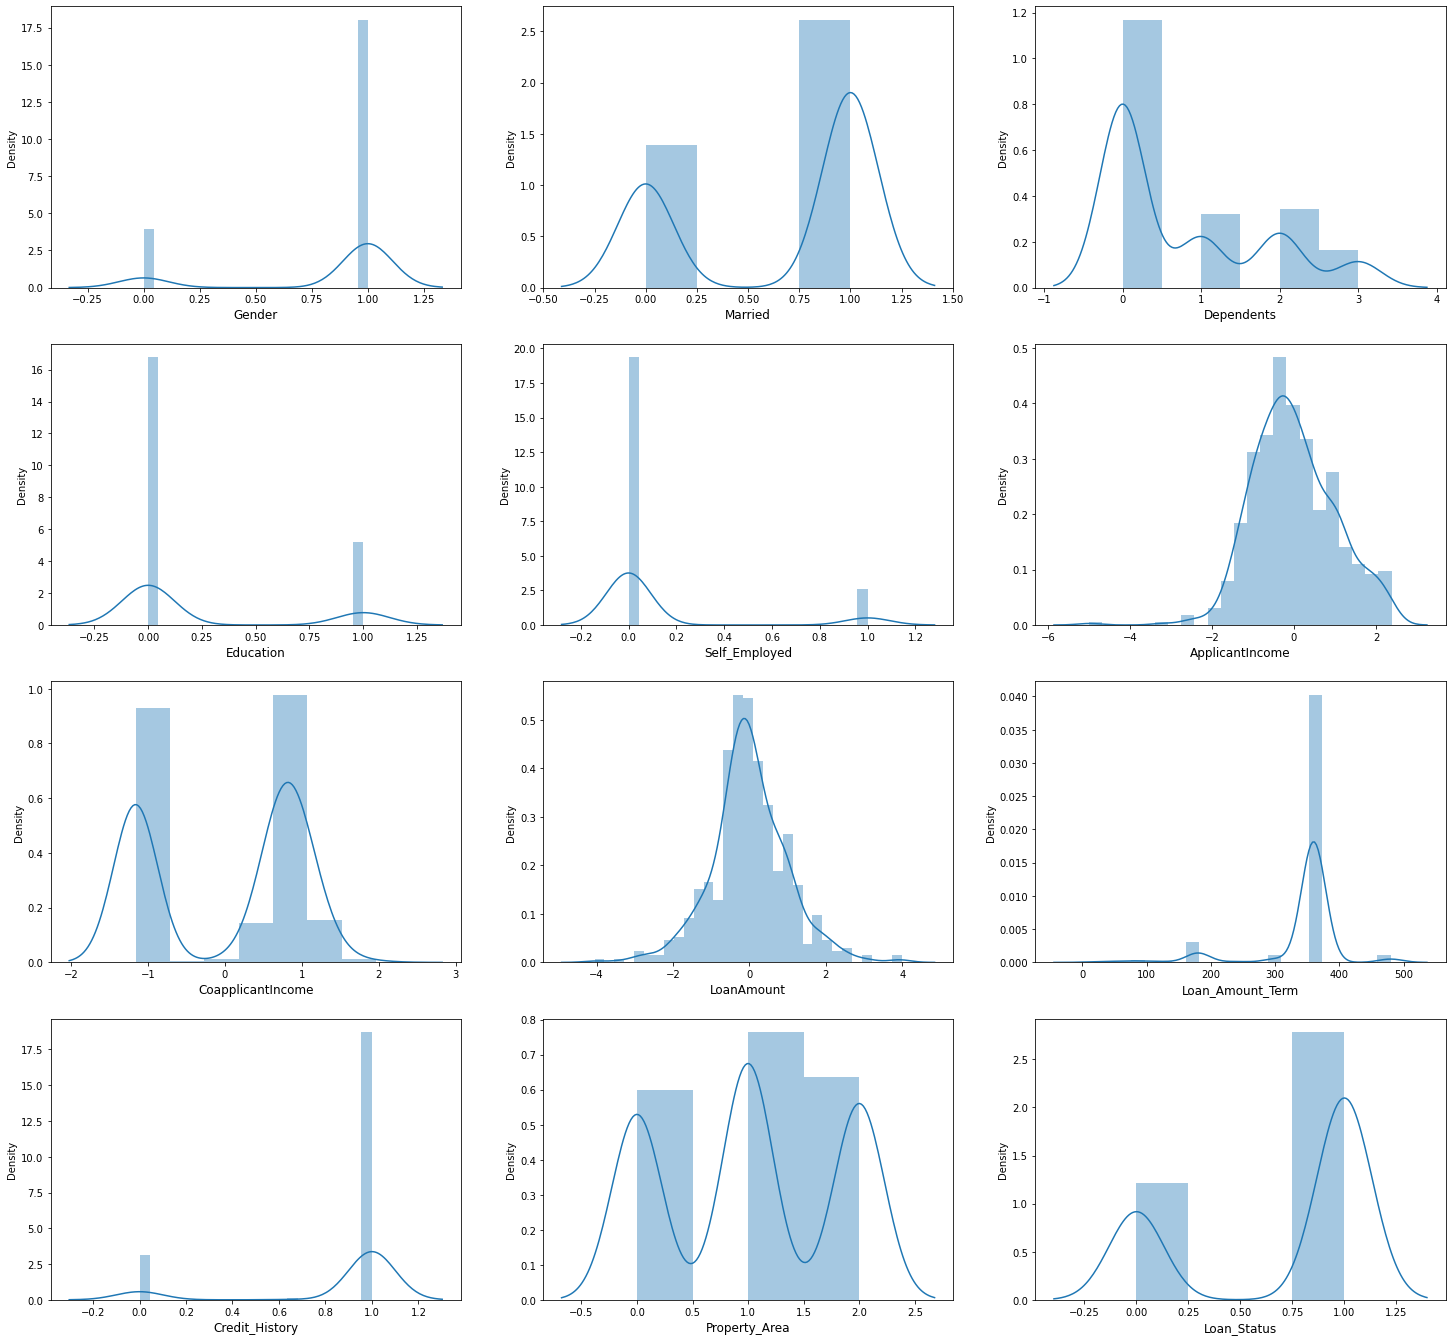

In [418]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=15: #as there are 64 columns in data
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()

#### Data standardization and vif values check for multicollinearity

In [419]:
X = data.drop(columns = ['Loan_Status'],axis=1)
y = data['Loan_Status']

In [420]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

In [421]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

,vif,Features
0,1.236042,Gender
1,1.426055,Married
2,1.233355,Dependents
3,1.067386,Education
4,1.052431,Self_Employed
5,1.894600,ApplicantIncome
6,1.689304,CoapplicantIncome
7,1.842831,LoanAmount
8,1.065760,Loan_Amount_Term
9,1.011561,Credit_History


### no multi-colinearity problem

## model training

In [422]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [423]:
for i in range(500,700):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = i)
    LR.fit(x_train,y_train)
    pred_train = LR.predict(x_train) 
    pred_test = LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy score is',accuracy_score(y_test,pred_test)*100)

At random state 532 model perform very well
At random state 532
Training accuracy score is 81.37254901960785
Testing accuracy score is 81.37254901960785
At random state 567 model perform very well
At random state 567
Training accuracy score is 81.37254901960785
Testing accuracy score is 81.37254901960785
At random state 574 model perform very well
At random state 574
Training accuracy score is 81.37254901960785
Testing accuracy score is 81.37254901960785
At random state 659 model perform very well
At random state 659
Training accuracy score is 81.37254901960785
Testing accuracy score is 81.37254901960785


## random_state = 659

In [424]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=659)

In [425]:
from collections import Counter

In [426]:
print('Training outcome - \n', y_train.value_counts())

Training outcome - 
 1    300
0    133
Name: Loan_Status, dtype: int64


In [427]:
from imblearn.over_sampling import SMOTE

In [428]:
ove_smp = SMOTE(0.80)
x_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)

print('The no. of classes before fit',format(Counter(y_train)))
print('The no. of classes after fit',format(Counter(y_train_ns)))

The no. of classes before fit Counter({1: 300, 0: 133})
The no. of classes after fit Counter({1: 300, 0: 240})


### Logistic regression

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr = LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred = lr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print('Confusion matrix\n',confusion_matrix(y_test,pred))

83.11688311688312
              precision    recall  f1-score   support

           0       0.80      0.55      0.65        22
           1       0.84      0.95      0.89        55

    accuracy                           0.83        77
   macro avg       0.82      0.75      0.77        77
weighted avg       0.83      0.83      0.82        77

Confusion matrix
 [[12 10]
 [ 3 52]]


### Decision Tree

In [430]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt)*100)
print(classification_report(y_test,pred_dt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_dt))

61.038961038961034
              precision    recall  f1-score   support

           0       0.35      0.41      0.38        22
           1       0.75      0.69      0.72        55

    accuracy                           0.61        77
   macro avg       0.55      0.55      0.55        77
weighted avg       0.63      0.61      0.62        77

Confusion matrix
 [[ 9 13]
 [17 38]]


## Random Forest

In [431]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf)*100)
print(classification_report(y_test,pred_rf))
print('Confusion matrix\n',confusion_matrix(y_test,pred_rf))

74.02597402597402
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        22
           1       0.80      0.85      0.82        55

    accuracy                           0.74        77
   macro avg       0.68      0.65      0.66        77
weighted avg       0.73      0.74      0.73        77

Confusion matrix
 [[10 12]
 [ 8 47]]


### Gradient Boosting

In [432]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_gb = gb.predict(x_test)
print(accuracy_score(y_test,pred_gb)*100)
print(classification_report(y_test,pred_gb))
print('Confusion matrix\n',confusion_matrix(y_test,pred_gb))

75.32467532467533
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        22
           1       0.80      0.87      0.83        55

    accuracy                           0.75        77
   macro avg       0.69      0.66      0.67        77
weighted avg       0.74      0.75      0.74        77

Confusion matrix
 [[10 12]
 [ 7 48]]


### Xtreme boosting

In [433]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(x_train_ns,y_train_ns)
pred_xgbt = xgbt.predict(x_test)
print(accuracy_score(y_test,pred_xgbt)*100)
print(classification_report(y_test,pred_xgbt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_xgbt))

[14:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
74.02597402597402
              precision    recall  f1-score   support

           0       0.54      0.59      0.57        22
           1       0.83      0.80      0.81        55

    accuracy                           0.74        77
   macro avg       0.69      0.70      0.69        77
weighted avg       0.75      0.74      0.74        77

Confusion matrix
 [[13  9]
 [11 44]]


### SVM

In [434]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_ns,y_train_ns)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc)*100)
print(classification_report(y_test,pred_svc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_svc))

77.92207792207793
              precision    recall  f1-score   support

           0       0.69      0.41      0.51        22
           1       0.80      0.93      0.86        55

    accuracy                           0.78        77
   macro avg       0.74      0.67      0.69        77
weighted avg       0.77      0.78      0.76        77

Confusion matrix
 [[ 9 13]
 [ 4 51]]


## Cross validation

In [435]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 81.56862745098039


In [436]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, X, y, cv=5)
print("Cross validation score of Decision tree model is",scr.mean()*100)

Cross validation score of Decision tree model is 70.3921568627451


In [437]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random forest  model is",scr.mean()*100)

Cross validation score of Random forest  model is 80.3921568627451


In [438]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of gradient boosting model is",scr.mean()*100)

Cross validation score of gradient boosting model is 79.6078431372549


In [439]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of xtreme gradient boosting model is",scr.mean()*100)

[14:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [440]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svc, X, y, cv=5)
print("Cross validation score of support vector machine model is",scr.mean()*100)

Cross validation score of support vector machine model is 81.76470588235294


### ROC-AUC

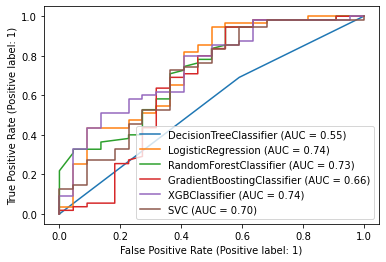

In [441]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(LR, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgbt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.show()

### Gridsearchcv of logistic regression

In [442]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [448]:
from sklearn.model_selection import GridSearchCV

X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=.15,random_state=659)
params = { 'penalty': ['l1','l2'], 
            'C': [0.001,0.01,0.1,1,10,100,1000]
         }
GCV2 = GridSearchCV(LR,param_grid = params)
GCV2.fit(X_train,Y_train)
print('best_pram', GCV2.best_params_)

rf=GCV2.best_estimator_ #reinstantiating with best params

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

rf_confusion_mat = confusion_matrix(y_test,y_pred)

print('\nconfusion mat =>','\n',rf_confusion_mat )
print('\naccuracy_score =>','\n',accuracy_score(y_test,y_pred))

best_pram {'C': 0.1, 'penalty': 'l2'}

confusion mat => 
 [[ 9 13]
 [ 2 53]]

accuracy_score => 
 0.8051948051948052


In [449]:
import joblib
joblib.dump(GCV2.best_estimator_,'loanapp.pkl')

['loanapp.pkl']

In [450]:
model=joblib.load("E:\Datatrained projects\Datatrained-projects\Loan application status\loanapp.pkl")
y_preds=model.predict(x_test)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,1
1,1
2,1
3,1
4,1
...,...
72,1
73,1
74,1
75,1


#### Conclusion - 
1) we have model accuracy of 80% after hypertuning the model by gridsearchcv

2) we have applied SMOTE for imbalancing of dataset

3) we have also plotted roc-auc to see area under score

4) Logistic regression is giving best results